<a href="https://colab.research.google.com/github/adamk6/healthCareCosts/blob/main/healthCareCosts2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
filename ='/content/drive/MyDrive/PTDataScience/assignments/healthCareCost.csv'
df = pd.read_csv(filename)
df.head()

Mounted at /content/drive


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HEALTHEXP,TOT,USD_CAP,A,2016,4605.950,NaN
1,AUS,HEALTHEXP,TOT,USD_CAP,A,2017,4710.617,D
2,AUS,HEALTHEXP,TOT,USD_CAP,A,2018,4964.533,E
3,AUS,HEALTHEXP,TOT,USD_CAP,A,2019,5187.419,E
4,AUT,HEALTHEXP,TOT,USD_CAP,A,2016,5195.360,NaN


# Begin to get an idea about the data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    534 non-null    object 
 1   INDICATOR   534 non-null    object 
 2   SUBJECT     534 non-null    object 
 3   MEASURE     534 non-null    object 
 4   FREQUENCY   534 non-null    object 
 5   TIME        534 non-null    int64  
 6   Value       534 non-null    float64
 7   Flag Codes  157 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.5+ KB


## Checking to make sure that the data in columns does not need cleaning

In [5]:
df['MEASURE'].value_counts()

USD_CAP    534
Name: MEASURE, dtype: int64

In [6]:
df['INDICATOR'].value_counts()

HEALTHEXP    534
Name: INDICATOR, dtype: int64

In [7]:
df['FREQUENCY'].value_counts()

A    534
Name: FREQUENCY, dtype: int64

In [8]:
df['TIME'].value_counts()

2017    138
2016    136
2018    133
2019    127
Name: TIME, dtype: int64

# Dropping unnecessary columns

In [9]:
df.drop(columns= 'Flag Codes', inplace = True)
df.drop(columns = 'INDICATOR', inplace = True)
df.drop(columns = 'MEASURE', inplace = True)
df.drop(columns = 'FREQUENCY', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  534 non-null    object 
 1   SUBJECT   534 non-null    object 
 2   TIME      534 non-null    int64  
 3   Value     534 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.8+ KB


## Rename column to make it a clearer 

In [10]:
df.rename(columns={'TIME': 'YEAR'}, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  534 non-null    object 
 1   SUBJECT   534 non-null    object 
 2   YEAR      534 non-null    int64  
 3   Value     534 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.8+ KB


In [29]:
df.YEAR = df.YEAR.astype(str) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  534 non-null    object 
 1   SUBJECT   534 non-null    object 
 2   YEAR      534 non-null    object 
 3   Value     534 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.8+ KB


## Creating filters to be used in data visualizations

In [30]:
year2016 =df['YEAR'] == '2016'
df.loc[year2016, :].head()

,LOCATION,SUBJECT,YEAR,Value
0,AUS,TOT,2016,4605.950
4,AUT,TOT,2016,5195.360
8,BEL,TOT,2016,4777.091
12,CAN,TOT,2016,5020.598
16,CZE,TOT,2016,2670.883


In [31]:
year2017 =df['YEAR'] == '2017'
df.loc[year2017, :].head()

,LOCATION,SUBJECT,YEAR,Value
1,AUS,TOT,2017,4710.617
5,AUT,TOT,2017,5360.423
9,BEL,TOT,2017,5013.987
13,CAN,TOT,2017,5155.347
17,CZE,TOT,2017,2891.435


In [33]:
year2018 =df['YEAR'] == '2018'
df.loc[year2018, :].head()

,LOCATION,SUBJECT,YEAR,Value
2,AUS,TOT,2018,4964.533
6,AUT,TOT,2018,5538.347
10,BEL,TOT,2018,5103.200
14,CAN,TOT,2018,5287.406
18,CZE,TOT,2018,3170.668


In [34]:
year2019 =df['YEAR'] == '2019'
df.loc[year2019, :].head()

,LOCATION,SUBJECT,YEAR,Value
3,AUS,TOT,2019,5187.419
7,AUT,TOT,2019,5851.055
11,BEL,TOT,2019,5427.957
15,CAN,TOT,2019,5418.383
19,CZE,TOT,2019,3427.910


In [35]:
year2019Total = (df['YEAR'] == '2019') & (df['SUBJECT'] == 'TOT')
year2019TotalFilter = df.loc[year2019Total,:]
year2019Comp = (df['YEAR'] == '2019') & (df['SUBJECT'] == 'COMPULSORY')
year2019CompFilter = df.loc[year2019Total,:]

In [17]:
TotCountryFilter2019 = df['YEAR'] == '2019'

totCountry2019 = df.loc[TotCountryFilter2019, :].groupby(['LOCATION'])['Value'].mean().sort_values(ascending = False).head(20)
totCountry2019


Series([], Name: Value, dtype: float64)

In [36]:
year2018Total = (df['YEAR'] == '2018') & (df['SUBJECT'] == 'TOT')
year2018TotalFilter = df.loc[year2018Total,:]
year2018Comp = (df['YEAR'] == '2018') & (df['SUBJECT'] == 'COMPULSORY')
year2018CompFilter = df.loc[year2018Total,:]

In [37]:
year2017Total = (df['YEAR'] == '2017') & (df['SUBJECT'] == 'TOT')
year2017TotalFilter = df.loc[year2017Total,:]
year2017Comp = (df['YEAR'] == '2017') & (df['SUBJECT'] == 'COMPULSORY')
year2017CompFilter = df.loc[year2017Total,:]

In [38]:
year2016Total = (df['YEAR'] == '2016') & (df['SUBJECT'] == 'TOT')
year2016TotalFilter = df.loc[year2016Total,:]
year2016Comp = (df['YEAR'] == '2016') & (df['SUBJECT'] == 'COMPULSORY')
year2016CompFilter = df.loc[year2016Total,:]

No handles with labels found to put in legend.


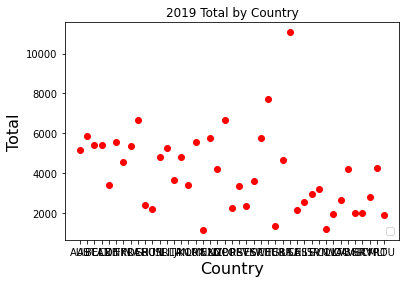

In [39]:
plt.scatter(year2019TotalFilter['LOCATION'], year2019TotalFilter['Value'], c = 'r',);

plt.title('2019 Total by Country', fontsize = 12);
plt.legend(loc = 'lower right', fontsize = 10);
plt.xlabel('Country', fontsize = 16);
plt.ylabel('Total', fontsize = 16);
#plt.xticks(rotation = 90)

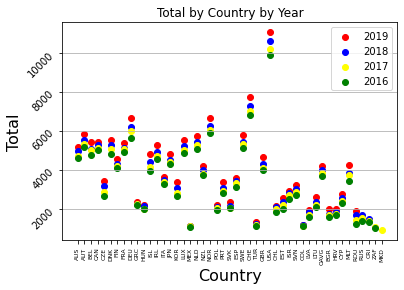

In [40]:
plt.scatter(year2019TotalFilter['LOCATION'], year2019TotalFilter['Value'], c = 'r',label= '2019');
plt.scatter(year2018TotalFilter['LOCATION'], year2018TotalFilter['Value'], c = 'blue',label= '2018');
plt.scatter(year2017TotalFilter['LOCATION'], year2017TotalFilter['Value'], c = 'yellow',label= '2017');
plt.scatter(year2016TotalFilter['LOCATION'], year2016TotalFilter['Value'], c = 'green',label= '2016');
plt.title('Total by Country by Year', fontsize = 12);
plt.legend(loc = 'upper right', fontsize = 10)
plt.xticks(rotation = 90,fontsize = 6);
plt.yticks(rotation = 45);

plt.xlabel('Country', fontsize = 16)
plt.ylabel('Total', fontsize = 16)
plt.grid(axis = 'y')

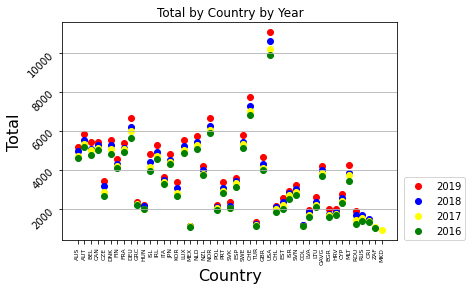

In [41]:
plt.scatter(year2019CompFilter['LOCATION'], year2019CompFilter['Value'], c = 'r',label= '2019');
plt.scatter(year2018CompFilter['LOCATION'], year2018CompFilter['Value'], c = 'blue',label= '2018');
plt.scatter(year2017CompFilter['LOCATION'], year2017CompFilter['Value'], c = 'yellow',label= '2017');
plt.scatter(year2016CompFilter['LOCATION'], year2016CompFilter['Value'], c = 'green',label= '2016');
plt.title('Total by Country by Year', fontsize = 12);
plt.legend(loc = (1.02,0), fontsize = 10)
plt.xticks(rotation = 90,fontsize = 6);
plt.yticks(rotation = 45);

plt.xlabel('Country', fontsize = 16)
plt.ylabel('Total', fontsize = 16)
plt.grid(axis = 'y')

In [ ]:
plt.bar(year2019CompFilter['LOCATION'], year2019CompFilter['Value'], color='k',label = '2019');
plt.bar(year2018CompFilter['LOCATION'], year2018CompFilter['Value'], color ='red',label = '2018');
plt.bar(year2017CompFilter['LOCATION'], year2017CompFilter['Value'], color ='blue',label = '2017');
plt.bar(year2016CompFilter['LOCATION'], year2016CompFilter['Value'], color ='green',label = '2016');
plt.xticks(rotation = 90,fontsize = 6);
plt.yticks(rotation = 45);
plt.xlabel('Country', fontsize=8)
plt.ylabel('Amount', fontsize= 8)
plt.title('Health Care Spending by Country', fontsize = 10)
plt.legend(loc=(1.02,0))
plt.grid(axis = 'y')

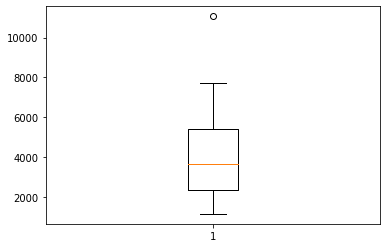

In [46]:
plt.boxplot(year2019CompFilter['Value']);

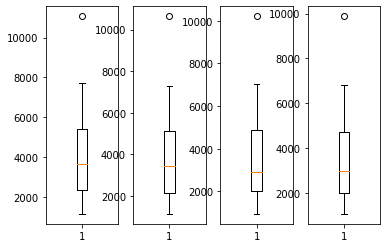

In [47]:
plt.subplot(1,4,1)
plt.boxplot(year2019CompFilter['Value']);

plt.subplot(1,4,2)
plt.boxplot(year2018CompFilter['Value']);

plt.subplot(1,4,3)
plt.boxplot(year2017CompFilter['Value']);

plt.subplot(1,4,4)
plt.boxplot(year2016CompFilter['Value']);

# Spending By Year in total

In [48]:


TotalYearFilter = pd.DataFrame(df.groupby(['YEAR'])['Value'].sum().sort_values(ascending = True).head()).reset_index()
TotalYearFilter

,YEAR,Value
0,2016,304475.888
1,2017,318330.332
2,2018,328606.614
3,2019,342477.544


(300000.0, 350000.0)

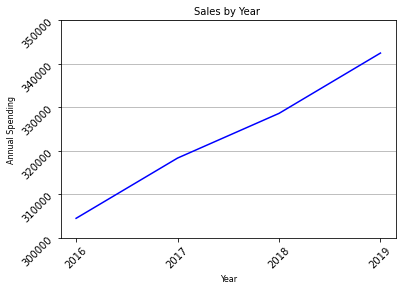

In [55]:
#plt.bar(TotalYearFilter['YEAR'], TotalYearFilter['Value'], color='blue',);
plt.plot(TotalYearFilter['YEAR'], TotalYearFilter['Value'], color='blue',);
plt.xticks(rotation = 45,fontsize = 10);
plt.yticks(rotation = 45);
plt.xlabel('Year', fontsize=8)
plt.ylabel('Annual Spending', fontsize= 8)
plt.title('Sales by Year ', fontsize = 10)
#plt.legend(loc=(1.02,0));
plt.grid(axis = 'y');

plt.ylim(2016,2019)
plt.ylim(300000,350000)

(250000.0, 350000.0)

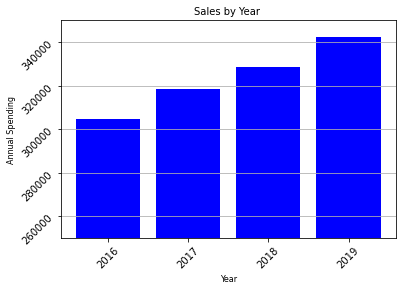

In [53]:
plt.bar(TotalYearFilter['YEAR'], TotalYearFilter['Value'], color='blue',);
#plt.plot(TotalYearFilter['YEAR'], TotalYearFilter['Value'], color='blue',);
plt.xticks(rotation = 45,fontsize = 10);
plt.yticks(rotation = 45);
plt.xlabel('Year', fontsize=8)
plt.ylabel('Annual Spending', fontsize= 8)
plt.title('Sales by Year ', fontsize = 10)
#plt.legend(loc=(1.02,0));
plt.grid(axis = 'y');

plt.ylim(2016,2019)
plt.ylim(250000,350000)